# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv('news_api')


In [29]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [32]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin', language='en')

btc_news


{'status': 'ok',
 'totalResults': 10334,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/saqib-shah',
   'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
   'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
   'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
   'publishedAt': '2021-06-09T12:04:40Z',
   'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Matt Novak',
   'title': 'El Salvador Becomes First Country to Recognize Bitcoin as Currency',
   'description': 'El Salvador

In [34]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum', language='en')


eth_news


{'status': 'ok',
 'totalResults': 2848,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'This blockchain development course bundle is on sale for 97% off',
   'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
   'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
   'publishedAt': '2021-06-17T04:05:00Z',
   'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price

In [35]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

btc_df = pd.DataFrame(btc_sentiments)

btc_cols = ['compound', 'negative', 'neutral', 'positive', 'date', 'text']
btc_df = btc_df[btc_cols]

btc_df.head()

,compound,negative,neutral,positive,date,text
0,0.8402,0.0,0.718,0.282,2021-06-09,El Salvador's President Nayib Bukele has made ...
1,0.1280,0.0,0.957,0.043,2021-06-09,El Salvador has become the first country in th...
2,0.6908,0.0,0.831,0.169,2021-06-14,"It's all about clean energy, it seems. \r\nElo..."
3,0.2732,0.0,0.940,0.060,2021-06-09,image captionThe move means bitcoin will be ac...
4,0.5574,0.0,0.893,0.107,2021-06-11,"Several crypto fans that descended on Miami, F..."


In [36]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(eth_sentiments)

eth_cols = ['compound', 'negative', 'neutral', 'positive', 'date', 'text']
eth_df = eth_df[eth_cols]

eth_df.head()

,compound,negative,neutral,positive,date,text
0,0.000,0.000,1.000,0.0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...
1,-0.296,0.061,0.939,0.0,2021-06-20,It wasn't long ago that your average person ha...
2,0.000,0.000,1.000,0.0,2021-05-31,A representation of virtual currency Ethereum ...
3,-0.340,0.066,0.934,0.0,2021-06-10,This article was translated from our Spanish e...
4,0.000,0.000,1.000,0.0,2021-06-03,This new mining feature is called 'Norton Cryp...


In [37]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.155950,0.028300,0.900950,0.070700
std,0.378432,0.036521,0.069026,0.071767
min,-0.526700,0.000000,0.718000,0.000000
25%,-0.050575,0.000000,0.844750,0.000000
50%,0.128000,0.000000,0.922000,0.060500
75%,0.369700,0.062000,0.943750,0.105500
max,0.840200,0.096000,1.000000,0.282000


In [38]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.038165,0.020650,0.94480,0.034550
std,0.299504,0.040732,0.06152,0.050623
min,-0.458800,0.000000,0.78200,0.000000
25%,-0.068300,0.000000,0.92700,0.000000
50%,0.000000,0.000000,0.93850,0.000000
75%,0.225725,0.015250,1.00000,0.067750
max,0.670500,0.151000,1.00000,0.188000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC had the highest

Q: Which coin had the highest compound score?

A: BTC was highest

Q. Which coin had the highest positive score?

A: BTC was highest

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [40]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
#     # Create a list of the words
#     words = word_tokenize(re_words)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
        
    # Remove the stop words
    sw = set(stopwords.words('english'))
    re_clean_sw = [word.lower() for word in words if word.lower() not in sw]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in re_clean_sw]
    
    return lem


In [41]:
btc_df.head()

,compound,negative,neutral,positive,date,text
0,0.8402,0.0,0.718,0.282,2021-06-09,El Salvador's President Nayib Bukele has made ...
1,0.1280,0.0,0.957,0.043,2021-06-09,El Salvador has become the first country in th...
2,0.6908,0.0,0.831,0.169,2021-06-14,"It's all about clean energy, it seems. \r\nElo..."
3,0.2732,0.0,0.940,0.060,2021-06-09,image captionThe move means bitcoin will be ac...
4,0.5574,0.0,0.893,0.107,2021-06-11,"Several crypto fans that descended on Miami, F..."


In [50]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df

,compound,negative,neutral,positive,date,text,tokens
0,0.8402,0.000,0.718,0.282,2021-06-09,El Salvador's President Nayib Bukele has made ...,"[el, salvador, president, nayib, bukele, made,..."
1,0.1280,0.000,0.957,0.043,2021-06-09,El Salvador has become the first country in th...,"[el, salvador, become, first, country, world, ..."
2,0.6908,0.000,0.831,0.169,2021-06-14,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seemselon, musk, tesla, caused..."
3,0.2732,0.000,0.940,0.060,2021-06-09,image captionThe move means bitcoin will be ac...,"[image, captionthe, move, mean, bitcoin, accep..."
4,0.5574,0.000,0.893,0.107,2021-06-11,"Several crypto fans that descended on Miami, F...","[several, crypto, fan, descended, miami, flori..."
5,0.7500,0.000,0.846,0.154,2021-06-05,"Hello friends, and welcome back to Week in Rev...","[hello, friend, welcome, back, week, reviewlas..."
6,-0.5267,0.096,0.904,0.000,2021-05-27,In spite of the environmental and regulatory i...,"[spite, environmental, regulatory, ill, genera..."
7,0.3400,0.000,0.930,0.070,2021-06-08,"By Mary-Ann RussonBusiness reporter, BBC News\...","[maryann, russonbusiness, reporter, bbc, newsi..."
8,-0.2732,0.062,0.938,0.000,2021-05-27,"After years of hesitation, PayPal continues to...","[year, hesitation, paypal, continues, double, ..."
9,0.1280,0.000,0.957,0.043,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...","[san, salvador, june, reuters, el, salvador, r..."


In [49]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df

,compound,negative,neutral,positive,date,text,tokens
0,0.0000,0.000,1.000,0.000,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,-0.2960,0.061,0.939,0.000,2021-06-20,It wasn't long ago that your average person ha...,"[wasnt, long, ago, average, person, clue, nft,..."
2,0.0000,0.000,1.000,0.000,2021-05-31,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, ethereum, ..."
3,-0.3400,0.066,0.934,0.000,2021-06-10,This article was translated from our Spanish e...,"[article, translated, spanish, edition, using,..."
4,0.0000,0.000,1.000,0.000,2021-06-03,This new mining feature is called 'Norton Cryp...,"[new, mining, feature, called, norton, crypto,..."
5,0.6705,0.000,0.812,0.188,2021-05-27,"""We are building a team"" the page declares, st...","[building, team, page, declares, stating, welc..."
6,0.1280,0.000,0.949,0.051,2021-05-31,Opinions expressed by Entrepreneur contributor...,"[opinion, expressed, entrepreneur, contributor..."
7,-0.4588,0.151,0.782,0.067,2021-06-04,CryptoPunks represent the only historically re...,"[cryptopunks, represent, historically, relevan..."
8,0.0000,0.000,1.000,0.000,2021-05-29,By Cristina CriddleTechnology reporter\r\nimag...,"[cristina, criddletechnology, reporterimage, c..."
9,0.2023,0.000,0.909,0.091,2021-05-28,"In March 2020, blockchain protocol solana offi...","[march, blockchain, protocol, solana, official..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [81]:
from collections import Counter
from nltk import ngrams
import nltk
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from collections import Counter

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\jalex\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
# Generate the Bitcoin N-grams where N=2
lemmatizer = WordNetLemmatizer()
btc_corpus = btc_df['text'].str.cat(sep=', ')


# Define preprocess function which is used for removing punctuation, lemmatizing, and removing stopwords
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


# Make Bigram Counter
def bigram_counter(btc_corpus): 
    # Combine all articles in corpus into one large string
    processed = process_text(btc_corpus)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(btc_corpus)

,bigram,count
0,"(bitcoin, legal)",6
1,"(legal, tender)",5
2,"(el, salvador)",5
3,"(reuters, el)",4
4,"(central, american)",3
5,"(june, reuters)",3
6,"(president, nayib)",2
7,"(nayib, bukele)",2
8,"(salvador, ha)",2
9,"(ha, become)",2


In [90]:
# Generate the Ethereum N-grams where N=2
lemmatizer = WordNetLemmatizer()
eth_corpus = eth_df['text'].str.cat(sep=', ')


# Define preprocess function which is used for removing punctuation, lemmatizing, and removing stopwords
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


# Make Bigram Counter
def bigram_counter(eth_corpus): 
    # Combine all articles in corpus into one large string
    processed = process_text(eth_corpus)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(eth_corpus)

,bigram,count
0,"(previous, closebitcoin)",4
1,"(closebitcoin, world)",4
2,"(world, biggest)",4
3,"(biggest, bestknown)",4
4,"(bestknown, cryptocurrency)",4
5,"(cryptocurrency, char)",3
6,"(digital, yuan)",3
7,"(adding, previous)",3
8,"(tldr, cryptocurrency)",2
9,"(cryptocurrency, ethereum)",2


In [91]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [99]:
# Get the top 10 words for Bitcoin
btc_processed = process_text(btc_corpus)
btc_top_10 = token_count(btc_processed)
btc_top_10

[('char', 20),
 ('bitcoin', 17),
 ('salvador', 8),
 ('us', 7),
 ('el', 6),
 ('legal', 6),
 ('cryptocurrency', 6),
 ('reuters', 6),
 ('tender', 5),
 ('country', 5)]

In [93]:
# Get the top 10 words for Ethereum
eth_processed = process_text(eth_corpus)
eth_top_10 = token_count(eth_processed)
eth_top_10

[('char', 19),
 ('cryptocurrency', 8),
 ('world', 7),
 ('ethereum', 5),
 ('digital', 5),
 ('blockchain', 4),
 ('nft', 4),
 ('bitcoin', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [100]:
# Text joiner
def join_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [117]:
# Create BTC input
btc_input = join_text(btc_corpus)
print(btc_input)

el salvadors president nayib bukele ha made good promise adopt bitcoin legal tender officials central american country congress voted accept cryptocurrency majori char el salvador ha become first country world recognize cryptocurrency bitcoin legal currency according president nayib bukele tweet wednesday citizens able char clean energy seemselon musk tesla caused ripple cryptocurrency market past month first announcing tesla bought billion worth bitcoi char image captionthe move mean bitcoin accepted everywhere good service alongside us dollarel salvador ha become first country world officially classify bitcoin char several crypto fan descended miami florida last weekend largest bitcoin conference history saying theyve tested positive covid larry cermak research director char hello friend welcome back week reviewlast week wrote tech taking disney week im talking search new crypto messiahif youre reading tec char spite environmental regulatory ill generally come crypto currency paypals

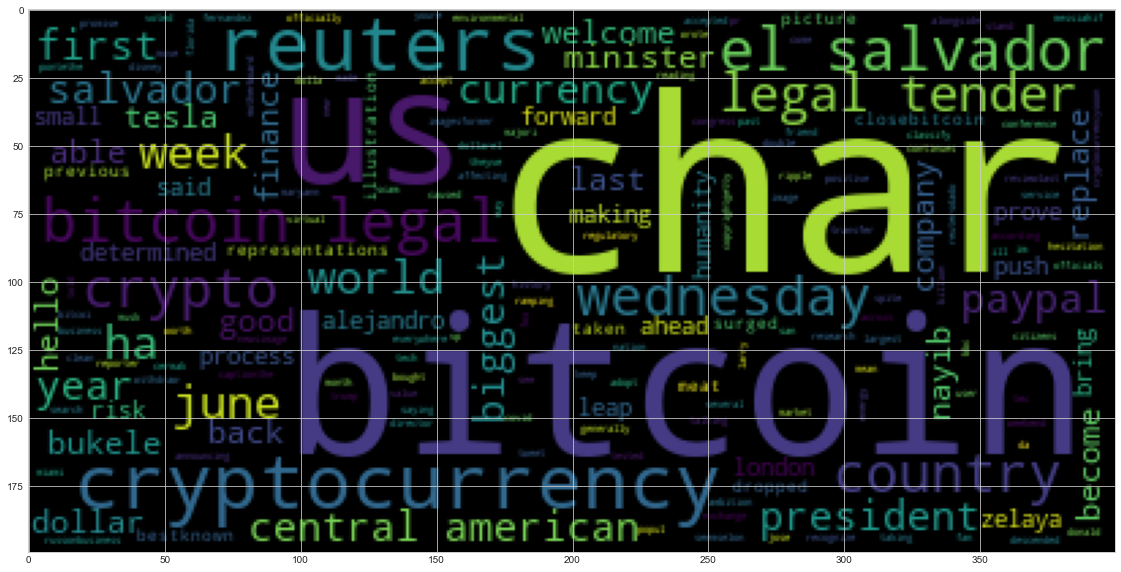

In [103]:
# Generate the Bitcoin word cloud
wc = WordCloud()
btc_img = wc.generate(btc_input)
plt.imshow(btc_img)

In [104]:
# Create ETH input
eth_input = join_text(eth_corpus)
print(eth_input)

tldr cryptocurrency ethereum solidity blockchain developer bundle sale june saving list priceis everyone know investing cryptocurrency char wasnt long ago average person clue nft wa nowadays theyre making headline selling hundred thousand buck predictably folk learning nfts char representation virtual currency ethereum seen front stock graph illustration taken february reutersdado ruvicillustrationfile photocryptocurrency ethereum extende char article wa translated spanish edition using ai technology errors may exist due processlast may vitalik buterin became youngest billionaire world ye char new mining feature called norton crypto rolling tomorrow norton user enrolled nortons early adopter program norton crypto enabled software use char building team page declares stating welcome exceptional engineer solidity react python designer gamers marketer community leader want join team se char opinions expressed entrepreneur contributor ownlaunched march racked one million user already safem

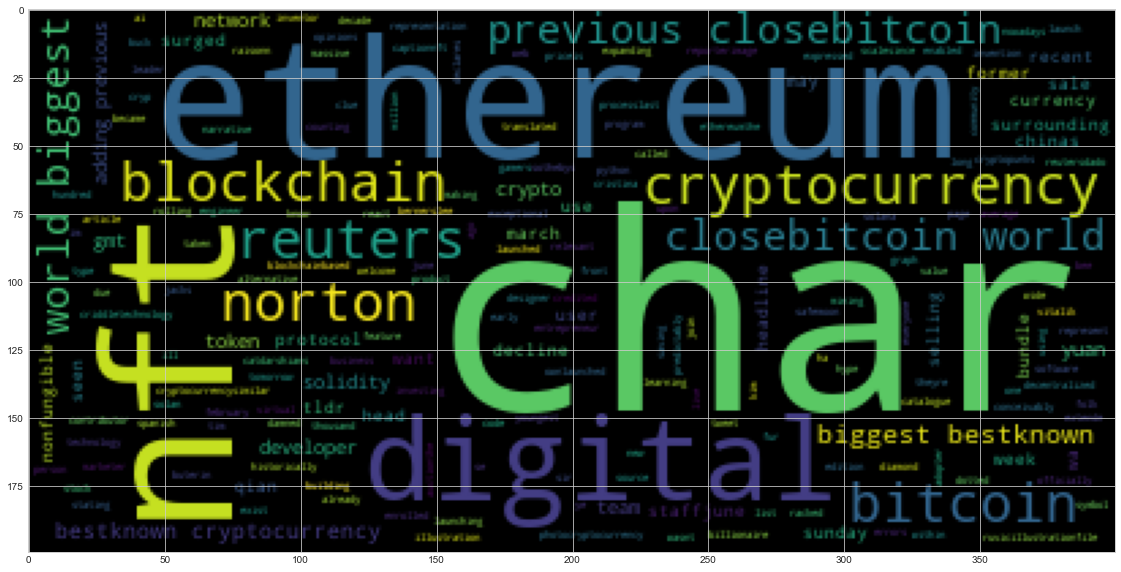

In [105]:
# Generate the Ethereum word cloud
eth_img = wc.generate(eth_input)
plt.imshow(eth_img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [106]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [107]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [121]:
# Concatenate all of the bitcoin text together
btc_ner_raw = ''.join(btc_corpus)
print(btc_ner_raw)

El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars], El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars], It's all about clean energy, it seems. 
Elon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars], image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar
El Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars], Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tes

In [124]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_ner_raw)

# Add a title to the document
btc_doc.user_data['title'] = "Bitcoin NER"

In [125]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [126]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

["El Salvador's", 'Nayib Bukele', 'Central American', 'El Salvador', 'first', 'Nayib Bukele', 'Wednesday', 'Citizens', 'Elon Musk', 'Tesla', 'the past few months', 'first', 'Tesla', '$1.5 billion', 'US', 'El Salvador', 'first', 'Bitcoin', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'Last week', 'Disney', 'This week', 'Tec', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'years', 'PayPal', 'Soon', 'PayPal', 'U.S.', 'Bitcoin', 'SAN SALVADOR', 'June 16', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'Central American', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'Bitcoin', 'May 20, 2021', 'Reuters', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'the Central American', 'Colonial Pipeline', 'JBS', 'up to one quarter', 'US', 'Late last week', 'Monday', 'm

---

## Ethereum NER

In [127]:
# Concatenate all of the ethereum text together
eth_ner_raw = ''.join(eth_corpus)
print(eth_ner_raw)

TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.
Is everyone you know investing in cryptocurrency? … [+949 chars], It wasn't long ago that your average person had no clue what an NFT was. Nowadays, they're making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars], A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars], This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.
Last May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars], This new mining feature is called 'Norton Crypto' and will be rolling out tomorrow to Norton 360 users enrolled in Norton's early adopter p

In [128]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_ner_raw)

# Add a title to the document
eth_doc.user_data['title'] = "Ethereum NER"

In [129]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [130]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['21.25', 'June 17', '97%', 'NFT', 'hundreds of thousands', 'Ethereum', 'February 19, 2021', 'Spanish', 'AI', 'Last May', 'Buterin', '27', 'tomorrow', 'Norton', 'Norton', 'Norton Crypto', 'Entrepreneur', 'March 2021', 'more than one million', 'SafeMoon', 'CryptoPunks', 'decades', 'Ill', 'Jacks', 'Cristina CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'March 2020', 'Tim Berners-Lee', 'NFT', "Sotheby's", 'NFT', 'Two', 'Keep Network', 'Last week', 'NFT', 'as much as', '90 percent', 'recent weeks', 'Yao Qian', 'China', 'Sina Finance', 'Monday', 'Costfoto', 'Barcroft Media', 'Getty Images', 'Yao Qian', 'China', 'Bitcoin', '8.54 %', '36,265', 'Wednesday', '2,853.31', 'Bitcoin', '30.8%', 'year', '27,734', 'Jan.', 'Bitcoin', '5.71%', '35,210', '0600', 'GMT', 'Saturday', '2,131.11', 'Bitcoin', '45.7%', '2021', '6', 'Reuters', 'June 13', 'Reuters', '5.11 %', '37,360.63', 'GMT', 'Sunday', '1,817.87', 'Bitcoin', 'Reuters', 'June 13', 'Reuters', '9.83 %', '22:05', 'GMT', 'Sunday', '3,492.71', 